Upload your dataset:


Saving PCOS_data.csv to PCOS_data.csv
First few rows of the dataset:


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Hb(g/dl),Cycle(R/I),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Endometrium (mm),Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,0,28,44.6,152.0,19.3,10.48,2,0,0,1.99,...,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,36,65.0,161.5,24.9,11.70,2,1,0,60.80,...,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,33,68.8,165.0,25.3,11.80,2,1,0,494.08,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,37,65.0,148.0,29.7,12.00,2,0,0,1.99,...,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,25,52.0,161.0,20.1,10.00,2,1,0,801.45,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 36' 'Unnamed: 37' 'Unnamed: 38' 'Unnamed: 39' 'Unnamed: 40'
 'Unnamed: 41' 'Unnamed: 42' 'Unnamed: 43']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


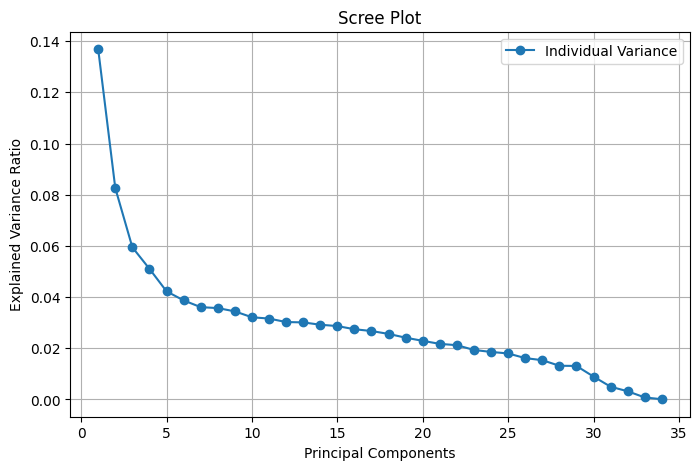

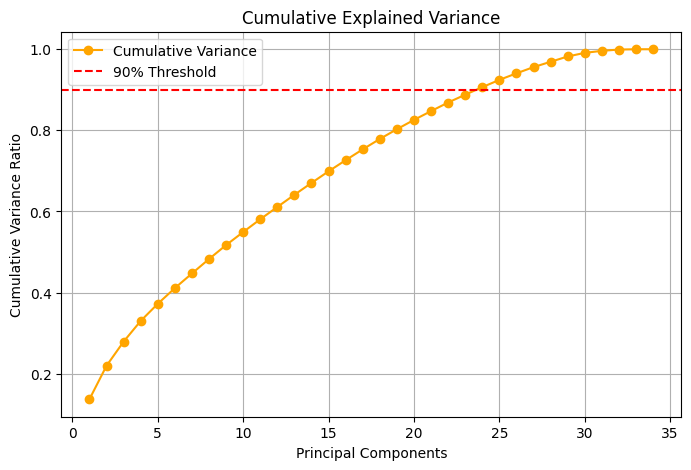

Number of components to explain ~90% variance: 24


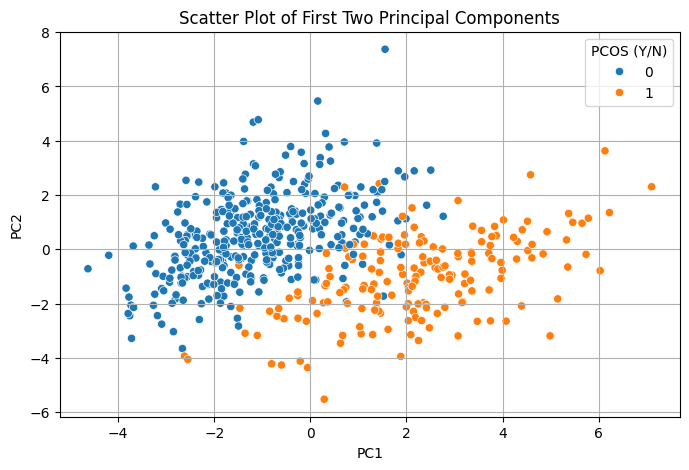


--- Evaluating Multiple Models ---

Training and evaluating: Logistic Regression
Accuracy for Logistic Regression: 0.9358
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        77
           1       0.96      0.81      0.88        32

    accuracy                           0.94       109
   macro avg       0.94      0.90      0.92       109
weighted avg       0.94      0.94      0.93       109

--------------------------------------------------
Training and evaluating: Support Vector Machine (Linear Kernel)
Accuracy for Support Vector Machine (Linear Kernel): 0.9450
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        77
           1       0.96      0.84      0.90        32

    accuracy                           0.94       109
   macro avg       0.95      0.92      0.93       109
weighted avg       0.95      0.94      0.94       109

--

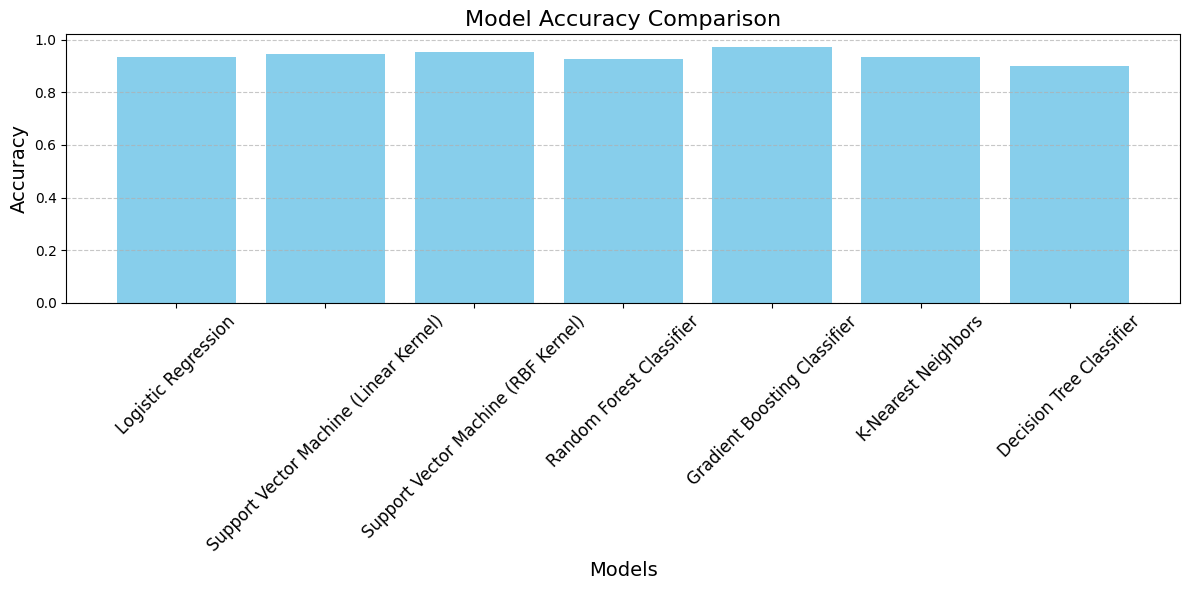

The best performing model is: Gradient Boosting Classifier with accuracy: 0.9725
PCA results with target saved as 'pca_transformed_data_with_target.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files

# Step 1: Upload the dataset
print("Upload your dataset:")
uploaded = files.upload()  # Prompt for file upload
filename = list(uploaded.keys())[0]

# Step 2: Load the dataset
data = pd.read_csv(filename)
print("First few rows of the dataset:")
display(data.head())

# Step 3: Check for the target variable
target_column = 'PCOS (Y/N)'
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Step 4: Handle missing values
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(numeric_data)

# Step 5: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Step 6: Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Step 7: Visualize Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.legend()
plt.show()

# Cumulative Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid()
plt.legend()
plt.show()

# Step 8: Find number of components explaining ~90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components to explain ~90% variance: {num_components_90}")

# Step 9: Reduce data using selected components
pca_df = pd.DataFrame(pca_result[:, :num_components_90], columns=[f'PC{i+1}' for i in range(num_components_90)])
pca_df[target_column] = data[target_column].values  # Add the target column back to the PCA data

# Step 10: EDA with PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=pca_df)
plt.title('Scatter Plot of First Two Principal Components')
plt.grid()
plt.show()

# Step 11: Split the data for classification
X = pca_df.drop(columns=[target_column])  # Features
y = pca_df[target_column]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "Support Vector Machine (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results for each model
results = {}

print("\n--- Evaluating Multiple Models ---\n")
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy  # Save accuracy for comparison

    # Print performance metrics
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Step 13: Visualize Model Performance
print("\n--- Model Accuracy Comparison ---\n")

# Plot a bar chart to compare accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the best model
best_model_name = max(results, key=results.get)
print(f"The best performing model is: {best_model_name} with accuracy: {results[best_model_name]:.4f}")

# Step 13: Save PCA results
pca_df.to_csv('pca_transformed_data_with_target.csv', index=False)
print("PCA results with target saved as 'pca_transformed_data_with_target.csv'")